<a href="https://colab.research.google.com/github/gauravjha201/Deep_Learning_basics/blob/main/DL_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [2]:
print(x_train.shape)
x_test.shape

(50000, 32, 32, 3)


(10000, 32, 32, 3)

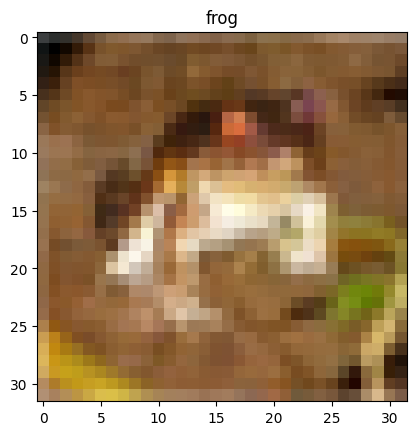

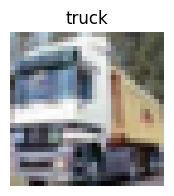

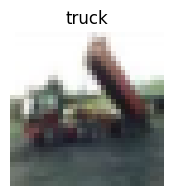

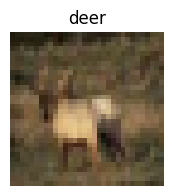

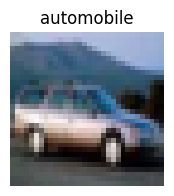

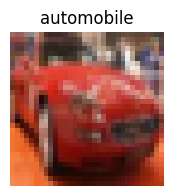

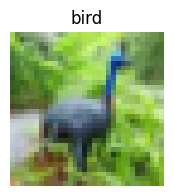

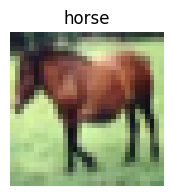

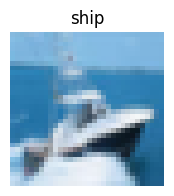

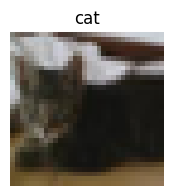

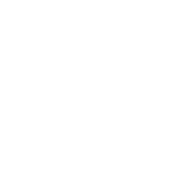

In [3]:
import matplotlib.pyplot as plt

cifar10_class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def show_image(index):
  if index<0 or index>=len(x_train):
    print('index out of range')
    return
  image=x_train[index]
  label=y_train[index][0]
  class_name=cifar10_class_names[label]

  plt.imshow(image)
  plt.title(class_name)
  plt.figure(figsize=(2,2))
  plt.axis('off')
  plt.show



for i in range(10):
  show_image(i)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

x_train=x_train/255
x_test=x_test/255

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

data_gen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True

)
data_gen.fit(x_train)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

ann_model=Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(521,activation='relu'),
    Dropout(0.3),
    Dense(256,activation='relu'),
    Dropout(0.3),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(10,activation='softmax')

])

ann_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

ann_model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 521)            │     1,601,033 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 521)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       133,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,768,851 (6.75 MB)

 Trainable params: 1,768,851 (6.75 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D

cnn_model=Sequential([
    Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(5,5),activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(128,(7,7),activation='relu',padding='same'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')


])

cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']

)

cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 717,258 (2.74 MB)

 Trainable params: 717,258 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
import time

start=time.time()

ann_history=ann_model.fit(
    x_train,y_train,
    validation_split=0.1,
    epochs=25,
    batch_size=64,
    verbose=1
)
ann_time=time.time()-start



start=time.time()
cnn_history=cnn_model.fit(
    x_train,y_train,
    validation_split=0.1,
    epochs=25,
    batch_size=64,
    verbose=1
)
cnn_time=time.time()-start

print("ANN Take time : ",ann_time)
print("CNN Take time : ",cnn_time)



Epoch 1/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.1809 - loss: 2.2120 - val_accuracy: 0.2976 - val_loss: 1.9093
Epoch 2/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2607 - loss: 1.9738 - val_accuracy: 0.3146 - val_loss: 1.8882
Epoch 3/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2789 - loss: 1.9364 - val_accuracy: 0.3230 - val_loss: 1.8675
Epoch 4/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2948 - loss: 1.9043 - val_accuracy: 0.3352 - val_loss: 1.8503
Epoch 5/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3048 - loss: 1.8805 - val_accuracy: 0.3218 - val_loss: 1.8561
Epoch 6/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3140 - loss: 1.8682 - val_accuracy: 0.3456 - val_loss: 1.7978
Epoch 7/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3201 - loss: 1.8449 - val_accuracy: 0.3412 - val_loss: 1.8140
Epoch 8/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3237 - loss: 1.8405 - val_accuracy: 0.

In [8]:
ann_test_loss,ann_test_acc=ann_model.evaluate(x_test,y_test)
cnn_test_loss,cnn_tets_acc=cnn_model.evaluate(x_test,y_test)
print("ANN Test Accuracy : ",ann_test_acc)
print("CNN Test Accuracy : ",cnn_tets_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4099 - loss: 1.6718
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7227 - loss: 1.5734
ANN Test Accuracy :  0.40950000286102295
CNN Test Accuracy :  0.722100019454956


In [10]:
import numpy as np

from sklearn.metrics import confusion_matrix,classification_report

ann_pred=np.argmax(ann_model.predict(x_test),axis=1)
cnn_pred=np.argmax(cnn_model.predict(x_test),axis=1)
y_true=np.argmax(y_test,axis=1)

ann_cm=confusion_matrix(y_true,ann_pred)
cnn_cm=confusion_matrix(y_true,cnn_pred)


print("ANN Classification Report")
print(classification_report(y_true,ann_pred))
print("CNN Classification Report")
print(classification_report(y_true,cnn_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
ANN Classification Report
              precision    recall  f1-score   support

           0       0.58      0.38      0.45      1000
           1       0.54      0.60      0.57      1000
           2       0.35      0.07      0.11      1000
           3       0.24      0.29      0.26      1000
           4       0.30      0.37      0.33      1000
           5       0.60      0.11      0.19      1000
           6       0.31      0.74      0.44      1000
           7       0.50      0.51      0.50      1000
           8       0.52      0.58      0.55      1000
           9       0.49      0.45      0.47      1000

    accuracy                           0.41     10000
   macro avg       0.44      0.41      0.39     10000
weighted avg       0.44      0.41      0.39     10000

CNN Classification Report
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      100

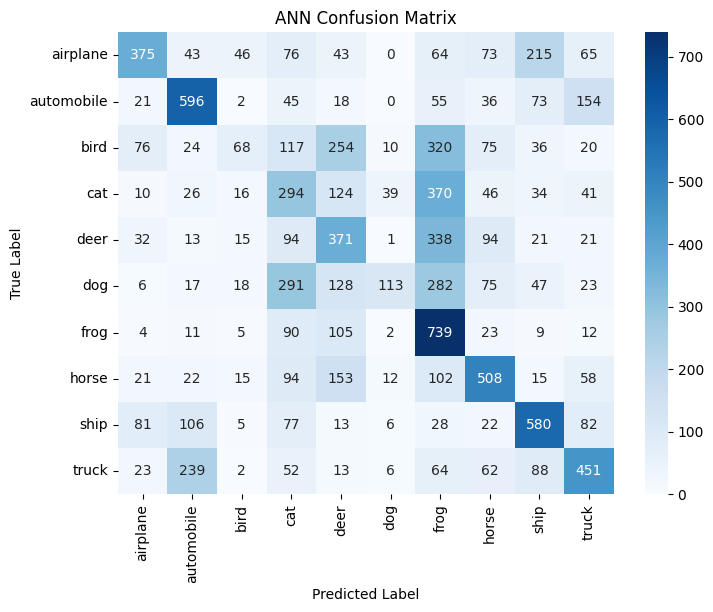

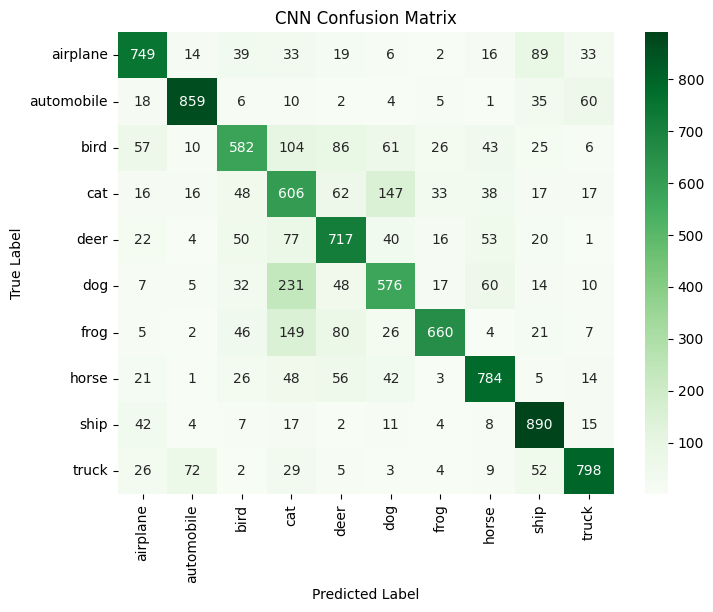

In [13]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(ann_cm,annot=True,fmt='d',cmap='Blues',
            xticklabels=cifar10_class_names,
            yticklabels=cifar10_class_names)
plt.title("ANN Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


plt.figure(figsize=(8,6))
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=cifar10_class_names,
            yticklabels=cifar10_class_names)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

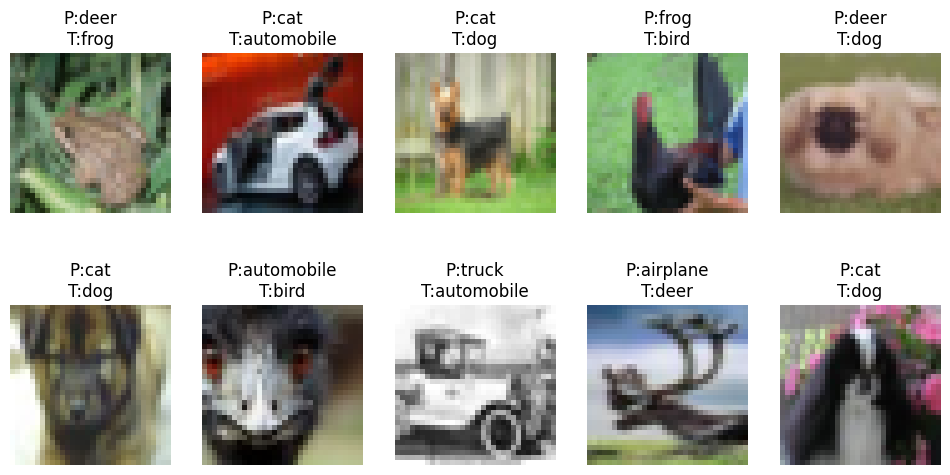

In [11]:
import matplotlib.pyplot as plt

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

mis_idx=np.where(cnn_pred!=y_true)[0][:10]

plt.figure(figsize=(12,6))
for i,idx in enumerate(mis_idx):
  plt.subplot(2,5,i+1)
  plt.imshow(x_test[idx])
  plt.title(f"P:{class_names[cnn_pred[idx]]}\nT:{class_names[y_true[idx]]}")
  plt.axis('off')
plt.show()
